In [3]:
import openai
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key = os.getenv('OPENAI_API_KEY')

In [4]:
def send_prompt(content, model="gpt-3.5-turbo", temperature=0):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature,
    )
    return response.choices[0].message["content"]

# Prompting Principles

## Clear Delimiters

In [5]:
text_to_summarize = f"""
Write a short essay of about what is happening in the story \
of the lord of the rings
"""

prompt = f"""
Summarize:
{text_to_summarize}
"""

print(send_prompt(prompt))

"The Lord of the Rings" is a fantasy epic written by J.R.R. Tolkien. The story revolves around a powerful ring that holds immense power and the journey to destroy it. The ring was created by the Dark Lord Sauron, who seeks to regain its possession and use it to conquer Middle-earth.

The story begins with the discovery of the ring by a hobbit named Bilbo Baggins. He passes it on to his nephew, Frodo, who is chosen to be the ring-bearer. Frodo is accompanied by a fellowship of diverse characters, including Gandalf the wizard, Aragorn the ranger, Legolas the elf, Gimli the dwarf, and several others.

Their mission is to take the ring to Mount Doom, the only place where it can be destroyed. Along the way, they face numerous challenges and encounters with various creatures, such as orcs, trolls, and the corrupted men under Sauron's influence. They also encounter allies, such as the Ents, a race of tree-like beings, and the Riders of Rohan.

As the journey progresses, Frodo and his companio

In [6]:
text_to_summarize = f"""
Write a short essay of about what is happening in the story \
of the lord of the rings
"""

prompt = f"""
Summarize the text delimited by triple backticks:

```{text_to_summarize}```
"""

print(send_prompt(prompt))

The text is asking for a short essay summarizing the events of the story "The Lord of the Rings."


## Structured Output

In [7]:
text_to_structure = f"""
Destroying the ring is easy! First of all you should grab the ring. \
Also you should probably not go alone but look for some companions \
before leaving for Mordor. Additionally you should also grab enough \
food and probably some weapons as well. The flowers are blooming and \
are beautiful. Gather everyone and start walking or riding east \
towards Mordor. Once you arrive there you will see a large volcano \
that you can not miss as it is the only one there. Climb on top of \
that and throw the ring in there. And Bäm, that's it - you are done.
"""

prompt = f"""
You are provided with a text delimited by triple backticks. It \
contains a sequence of instructions, which should be re-written \
in the following format:

Step 1 - ...
Step 2 - ...
...
Step N - ...

```{text_to_structure}```
"""

print(send_prompt(prompt))

Step 1 - Grab the ring.
Step 2 - Find companions before leaving for Mordor.
Step 3 - Gather enough food and weapons.
Step 4 - Start walking or riding east towards Mordor with everyone.
Step 5 - Arrive at the large volcano in Mordor.
Step 6 - Climb on top of the volcano.
Step 7 - Throw the ring into the volcano.
Step 8 - Congratulations, you are done!


## Explicitly unsatisfied condition

In [9]:
text_to_structure = f"""
The sun is shining brightly today, and the birds of middle earth are \
singing. It's a beautiful day to go to start the long journey to Mordor \ 
The flowers are blooming, and the ents are swaying gently in the breeze. \
Elves, humans dwarves and hobbits are out and about, enjoying the lovely \
weather. Some are having picnics, while others are playing games or \
simply relaxing on the grass. It's a perfect day to spend time outdoors \
and appreciate the beauty of nature.
"""
prompt = f"""
You are provided with a text delimited by triple backticks. It \
contains a sequence of instructions, which should be re-written \
in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

```{text_to_structure}```
"""

print(send_prompt(prompt))

Step 1 - The sun is shining brightly today, and the birds of middle earth are singing. It's a beautiful day to go to start the long journey to Mordor.
Step 2 - The flowers are blooming, and the ents are swaying gently in the breeze. Elves, humans dwarves and hobbits are out and about, enjoying the lovely weather.
Step 3 - Some are having picnics, while others are playing games or simply relaxing on the grass. It's a perfect day to spend time outdoors and appreciate the beauty of nature.


## Few-shot prompting

In [10]:
topic = "resilience"
prompt = f"""
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest \ 
valley flows from a modest spring; the \ 
grandest symphony originates from a single note; \ 
the most intricate tapestry begins with a solitary thread.

<child>: Teach me about {topic}.
"""

print(send_prompt(prompt))

<grandparent>: Resilience is like a mighty oak tree that withstands the strongest storms, bending but never breaking. It is the unwavering determination to rise again after every fall, and the ability to find strength in the face of adversity. Just as a diamond is formed under immense pressure, resilience is forged through challenges and hardships, making us stronger and more resilient in the process.


## Temperature

In [12]:
topic = "resilience"
prompt = f"""
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest \ 
valley flows from a modest spring; the \ 
grandest symphony originates from a single note; \ 
the most intricate tapestry begins with a solitary thread.

<child>: Teach me about {topic}.
"""

print(send_prompt(prompt, temperature=0.7))

<grandparent>: Resilience is the strength to withstand and bounce back from life's challenges. It is like a mighty tree that bends but never breaks in the face of a storm. It is the unwavering determination that allows us to rise again after every fall.


In [17]:
prompt = """
She was a very friendly companion: p
He was very dangerous to travel with: n
It took really great care for her: p
Rain was pouring down and everyone got wet: n
She was dancing joyfully: p
He fell and hurt his ankle: 
"""

print(send_prompt(prompt, temperature=0.7))

n


## Explicitly list steps to solution if known

In [18]:
instructions = f"""
Destroying the ring is easy! First of all you should grab the ring. \
Also you should probably not go alone but look for some companions \
before leaving for Mordor. Additionally you should also grab enough \
food and probably some weapons as well. The flowers are blooming and \
are beautiful. Gather everyone and start walking or riding east \
towards Mordor. Once you arrive there you will see a large volcano \
that you can not miss as it is the only one there. Climb on top of \
that and throw the ring in there. And Bäm, that's it - you are done.
"""

prompt = f"""
Your task is to perform the following sequence of instructions on \
the text in triple backticks: \
1: Rewrite the presented sequence of instructions in the format \
step-n: <instruction> \
2: Translate the instructions from the previous step into elvish, \
french and korean \
3: Output the translations from 2 as a json object with the language as key \
and the translations inside in with step-n as key for example:
korean:
  step-1: <instructions>
  step-2: ...
  ...
  step-n: ...
4: Output the json as a html table

Text: ```{instructions}```
"""

print(send_prompt(prompt))

1: Rewrite the presented sequence of instructions in the format step-n: <instruction>
step-1: Destroying the ring is easy!
step-2: First of all you should grab the ring.
step-3: Also you should probably not go alone but look for some companions before leaving for Mordor.
step-4: Additionally you should also grab enough food and probably some weapons as well.
step-5: The flowers are blooming and are beautiful.
step-6: Gather everyone and start walking or riding east towards Mordor.
step-7: Once you arrive there you will see a large volcano that you can not miss as it is the only one there.
step-8: Climb on top of that and throw the ring in there.
step-9: And Bäm, that's it - you are done.

2: Translate the instructions from the previous step into elvish, french and korean
elvish:
step-1: Dagoth i vilya i nána!
step-2: Isto i vilya nána tenna.
step-3: Lle isto naa ú-gwanno, ar lle naa ú-danna i chenthiel man i Mordor.
step-4: Lle isto naa ú-danna i lamben, ar naa ú-danna i chenthiel man 

In [19]:
from IPython.core.display import display, HTML
html = f"""
<table>
  <tr>
    <th>Language</th>
    <th>step-1</th>
    <th>step-2</th>
    <th>step-3</th>
    <th>step-4</th>
    <th>step-5</th>
    <th>step-6</th>
    <th>step-7</th>
    <th>step-8</th>
    <th>step-9</th>
  </tr>
  <tr>
    <td>elvish</td>
    <td>Dagoth i vilya i nána!</td>
    <td>Isto i vilya nána tenna.</td>
    <td>Lle isto naa ú-gwanno, ar lle naa ú-danna i chenthiel man i Mordor.</td>
    <td>Lle isto naa ú-danna i lamben, ar naa ú-danna i chenthiel man i Mordor.</td>
    <td>I lassë nána nána i lindë ar i calima.</td>
    <td>Hlarë i lamben ar hlarë i nér i oronti i Mordor.</td>
    <td>Oio i nána lle naa tara i núrë omenta, naa lle naa ú-anna i núrë omenta.</td>
    <td>Hlarë i nána i núrë omenta ar hlarë i vilya nána i núrë omenta.</td>
    <td>Ar Bäm, sina lle - lle naa.</td>
  </tr>
  <tr>
    <td>french</td>
    <td>Détruire l'anneau est facile !</td>
    <td>Tout d'abord, vous devriez saisir l'anneau.</td>
    <td>Vous ne devriez probablement pas y aller seul, mais chercher des compagnons avant de partir pour Mordor.</td>
    <td>De plus, vous devriez également prendre suffisamment de nourriture et probablement aussi des armes.</td>
    <td>Les fleurs sont en train de fleurir et sont magnifiques.</td>
    <td>Rassemblez tout le monde et commencez à marcher ou à chevaucher vers l'est en direction de Mordor.</td>
    <td>Une fois que vous arrivez là-bas, vous verrez un grand volcan que vous ne pouvez pas manquer car il est le seul là-bas.</td>
    <td>Grimpez en haut de celui-ci et jetez l'anneau dedans.</td>
    <td>Et Bäm, c'est fini - vous avez terminé.</td>
  </tr>
  <tr>
    <td>korean</td>
    <td>반지를 파괴하는 것은 쉽습니다!</td>
    <td>먼저 반지를 잡아야 합니다.</td>
    <td>혼자 가지 않고 모르도르로 떠나기 전에 동행자를 찾아야 합니다.</td>
    <td>또한 충분한 음식과 아마도 무기도 가져가야 합니다.</td>
    <td>꽃들이 피어나고 아름답습니다.</td>
    <td>모두를 모아 동쪽으로 걸어가거나 타고 모르도르로 향하세요.</td>
    <td>도착하면 거기에 하나뿐인 큰 화산을 볼 수 있을 것입니다.</td>
    <td>그 위로 올라가서 반지를 거기에 던져주세요.</td>
    <td>그리고 바암, 끝났습니다 - 당신은 끝났습니다.</td>
  </tr>
</table>
"""
display(HTML(html))


Language,step-1,step-2,step-3,step-4,step-5,step-6,step-7,step-8,step-9
elvish,Dagoth i vilya i nána!,Isto i vilya nána tenna.,"Lle isto naa ú-gwanno, ar lle naa ú-danna i chenthiel man i Mordor.","Lle isto naa ú-danna i lamben, ar naa ú-danna i chenthiel man i Mordor.",I lassë nána nána i lindë ar i calima.,Hlarë i lamben ar hlarë i nér i oronti i Mordor.,"Oio i nána lle naa tara i núrë omenta, naa lle naa ú-anna i núrë omenta.",Hlarë i nána i núrë omenta ar hlarë i vilya nána i núrë omenta.,"Ar Bäm, sina lle - lle naa."
french,Détruire l'anneau est facile !,"Tout d'abord, vous devriez saisir l'anneau.","Vous ne devriez probablement pas y aller seul, mais chercher des compagnons avant de partir pour Mordor.","De plus, vous devriez également prendre suffisamment de nourriture et probablement aussi des armes.",Les fleurs sont en train de fleurir et sont magnifiques.,Rassemblez tout le monde et commencez à marcher ou à chevaucher vers l'est en direction de Mordor.,"Une fois que vous arrivez là-bas, vous verrez un grand volcan que vous ne pouvez pas manquer car il est le seul là-bas.",Grimpez en haut de celui-ci et jetez l'anneau dedans.,"Et Bäm, c'est fini - vous avez terminé."
korean,반지를 파괴하는 것은 쉽습니다!,먼저 반지를 잡아야 합니다.,혼자 가지 않고 모르도르로 떠나기 전에 동행자를 찾아야 합니다.,또한 충분한 음식과 아마도 무기도 가져가야 합니다.,꽃들이 피어나고 아름답습니다.,모두를 모아 동쪽으로 걸어가거나 타고 모르도르로 향하세요.,도착하면 거기에 하나뿐인 큰 화산을 볼 수 있을 것입니다.,그 위로 올라가서 반지를 거기에 던져주세요.,"그리고 바암, 끝났습니다 - 당신은 끝났습니다."


# With access to model
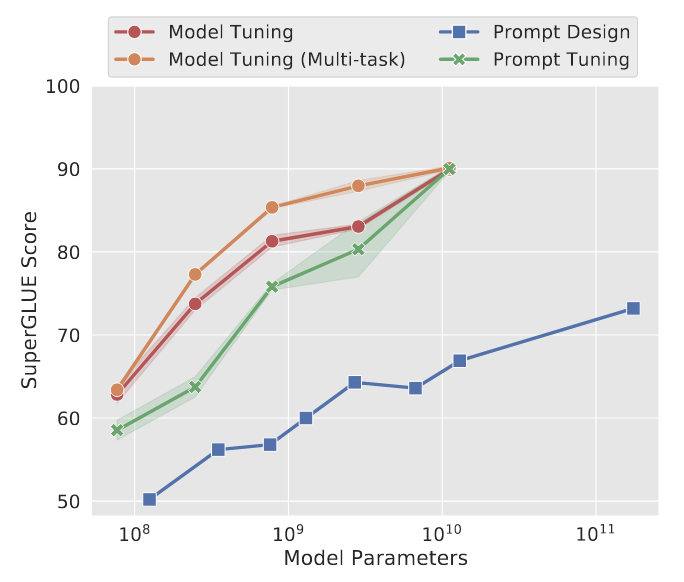